In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
# load  the data
df = pd.read_csv("../data/water_quality_potability.csv")
# get the first five rows of the data
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.160466,195.712338,22636.785632,7.235746,336.794067,424.396711,14.376178,68.105888,3.991681,1
1,7.187738,193.202237,21263.028076,7.117409,333.997161,430.163405,14.206928,64.807703,3.957064,0
2,5.400302,140.739062,17266.593422,10.056852,328.358241,472.874073,11.256381,56.931906,4.824786,0
3,7.078913,196.886558,21539.185679,7.104867,335.223406,429.400333,14.344261,65.289765,3.909317,0
4,7.052283,194.971523,21659.468727,7.101790,335.669903,425.620822,14.100794,66.178504,3.989340,0


In [3]:
#  get the shape of the data
df.shape

(10000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               10000 non-null  float64
 1   Hardness         10000 non-null  float64
 2   Solids           10000 non-null  float64
 3   Chloramines      10000 non-null  float64
 4   Sulfate          10000 non-null  float64
 5   Conductivity     10000 non-null  float64
 6   Organic_carbon   10000 non-null  float64
 7   Trihalomethanes  10000 non-null  float64
 8   Turbidity        10000 non-null  float64
 9   Potability       10000 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 781.4 KB


All the features are numerical features

In [5]:
df.isnull().sum() # checking for missing values

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [6]:
df.Potability.unique() # checking the unique values in the target column

array([1, 0], dtype=int64)

In [7]:
# getting the statistical summary of the data
df.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.091423,196.028208,21984.910331,7.135162,333.063156,426.360604,14.339111,66.465396,3.972793,0.500000
std,0.706589,14.636373,3895.384413,0.710279,18.513111,36.080914,1.484742,7.182162,0.350731,0.500025
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,7.022816,194.609577,21458.018822,7.057332,331.124701,422.515794,14.188197,65.750893,3.935476,0.000000
50%,7.093586,196.057913,21977.488628,7.133492,333.098363,426.246982,14.335375,66.469224,3.973391,0.500000
75%,7.161077,197.460684,22503.494592,7.215818,334.943071,429.921153,14.483844,67.200320,4.010571,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,708.226364,27.006707,124.000000,6.494749,1.000000


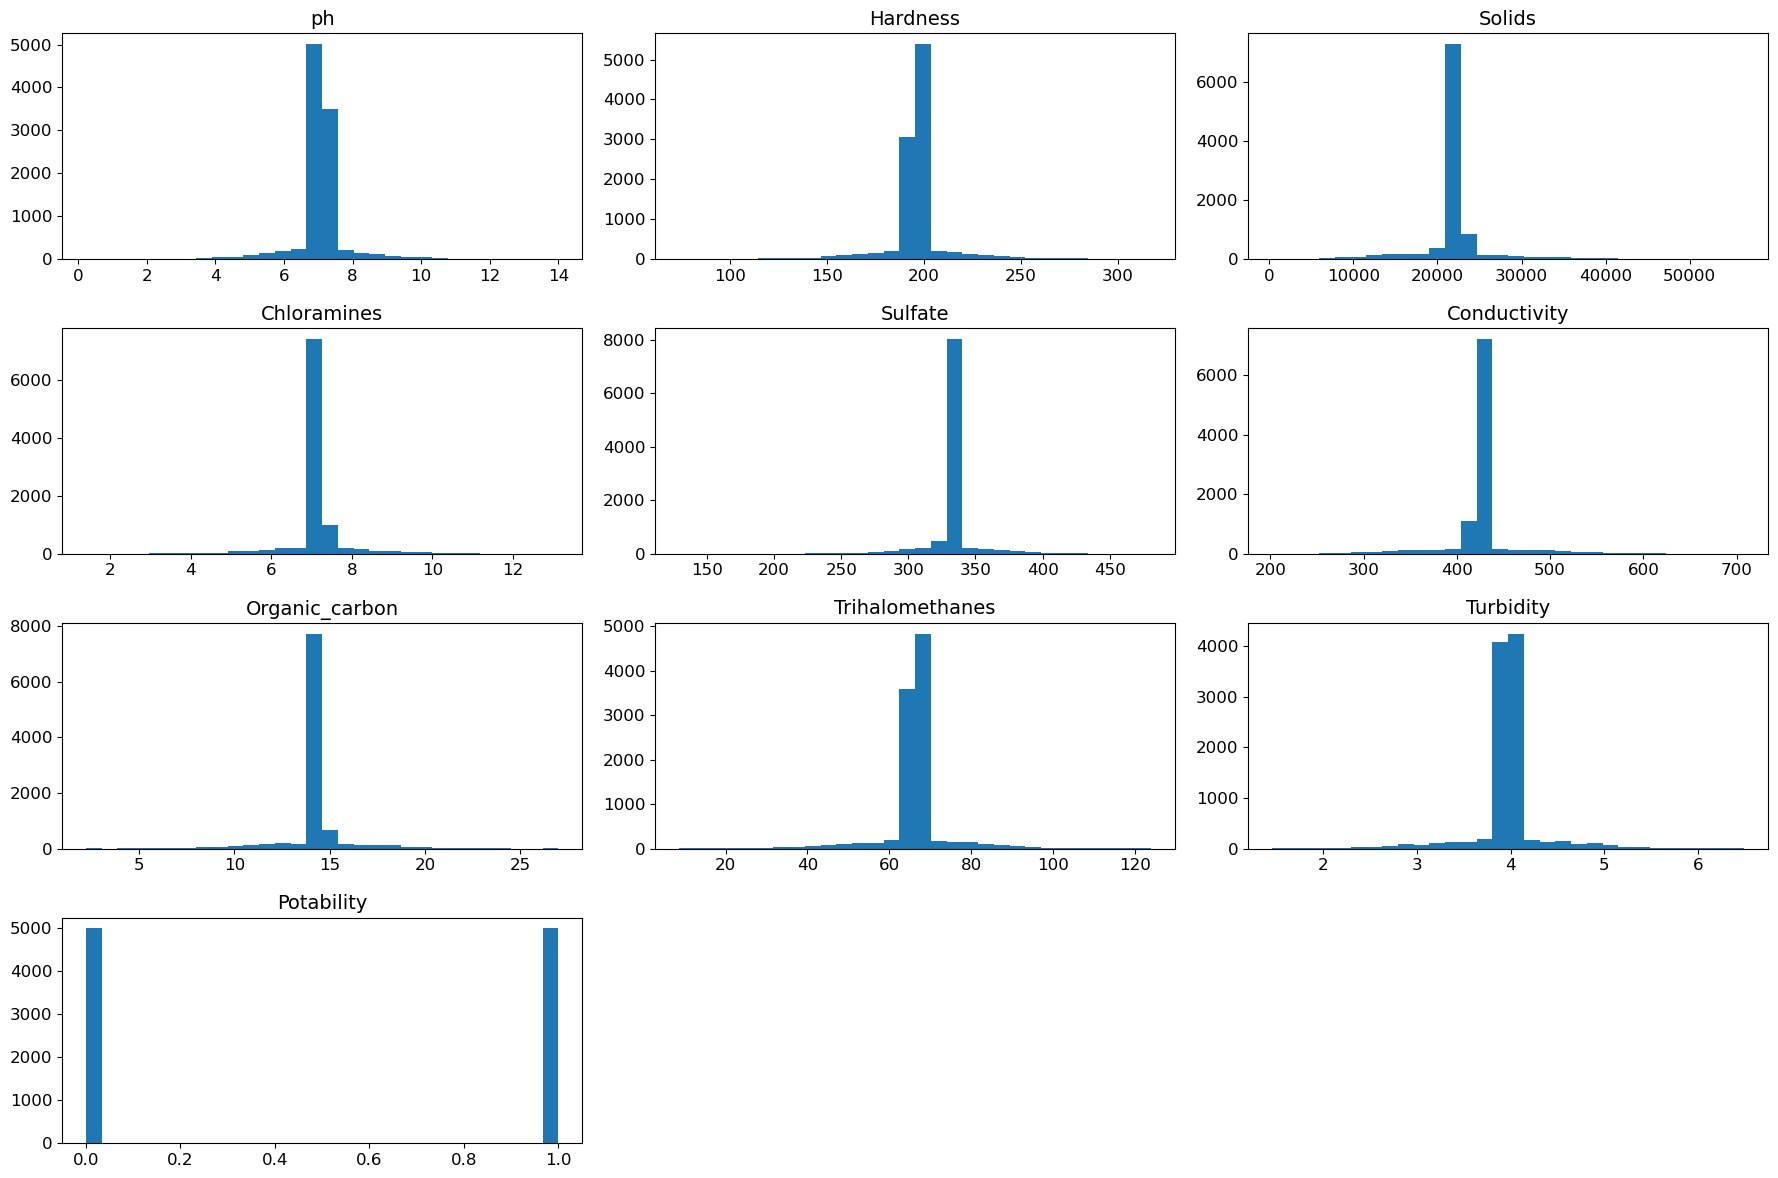

In [8]:
# Increase default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Plot histograms with larger figure
df.hist(bins=30, figsize=(18, 12), grid=False)

plt.tight_layout()  # prevents overlap
plt.show()


Text(0.5, 1.0, 'Distribution of Potability Classes')

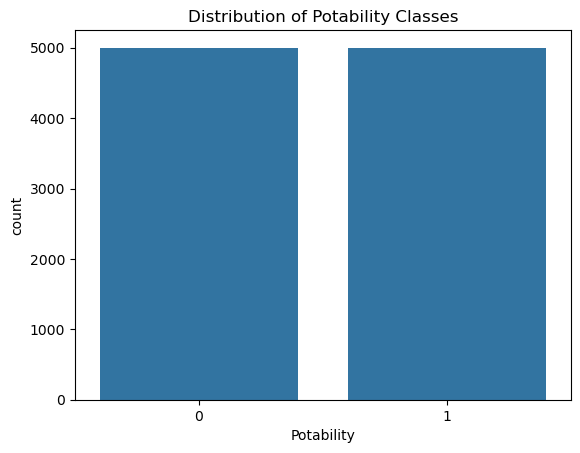

In [8]:
# checking for class imbalance in the portabilty column
sns.countplot(x='Potability', data=df)
plt.title('Distribution of Potability Classes')

In [9]:
df.Potability.value_counts()  # checking the counts of each class in the target column

Potability
1    5000
0    5000
Name: count, dtype: int64

The class are balance

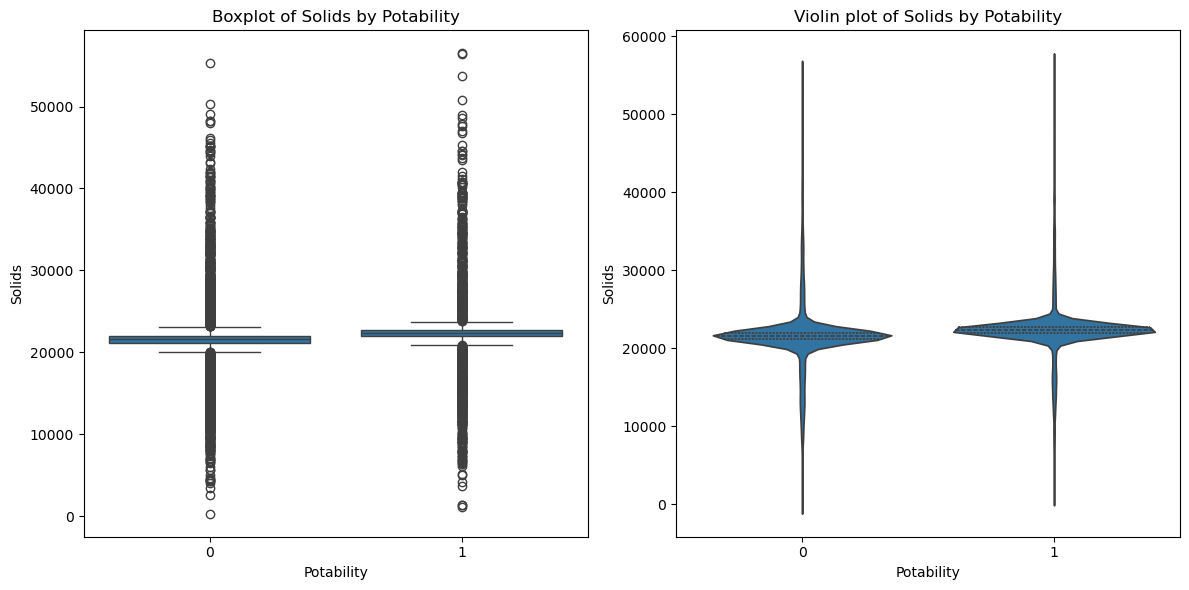

In [10]:
# checking for outliers using box plot

def plot_feature(df, feature):
    plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    sns.boxplot(x='Potability', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Potability')

    plt.subplot(1,2,2)
    sns.violinplot(x='Potability', y=feature, data=df, inner='quartile')
    plt.title(f'Violin plot of {feature} by Potability')

    plt.tight_layout()
    plt.show()

# Example
plot_feature(df, "Solids")


In [11]:
# checkin for outliers using IQR method
# first pass will train our model with the outliers included and get the baseline performance
# then we will remove the outliers and retrain the model to see if there is any improvement in performance

Q1 = df.drop('Potability', axis=1).quantile(0.25)
Q3 = df.drop('Potability', axis=1).quantile(0.75)
IQR = Q3 - Q1

outliers = ((df.drop('Potability', axis=1) < (Q1 - 1.5 * IQR)) | 
            (df.drop('Potability', axis=1) > (Q3 + 1.5 * IQR))).sum()

print("Number of outliers per feature (IQR):")
print(outliers)


Number of outliers per feature (IQR):
ph                 1688
Hardness           1677
Solids             1623
Chloramines        1676
Sulfate            1672
Conductivity       1720
Organic_carbon     1712
Trihalomethanes    1672
Turbidity          1705
dtype: int64


In [12]:
df.describe().T[['min','25%','50%','75%','max']]
# This shows if max is way larger than 75% (suspicious outliers).

,min,25%,50%,75%,max
ph,0.227499,7.022816,7.093586,7.161077,14.000000
Hardness,73.492234,194.609577,196.057913,197.460684,317.338124
Solids,320.942611,21458.018822,21977.488628,22503.494592,56488.672413
Chloramines,1.390871,7.057332,7.133492,7.215818,13.127000
Sulfate,129.000000,331.124701,333.098363,334.943071,481.030642
Conductivity,201.619737,422.515794,426.246982,429.921153,708.226364
Organic_carbon,2.200000,14.188197,14.335375,14.483844,27.006707
Trihalomethanes,8.577013,65.750893,66.469224,67.200320,124.000000
Turbidity,1.450000,3.935476,3.973391,4.010571,6.494749
Potability,0.000000,0.000000,0.500000,1.000000,1.000000


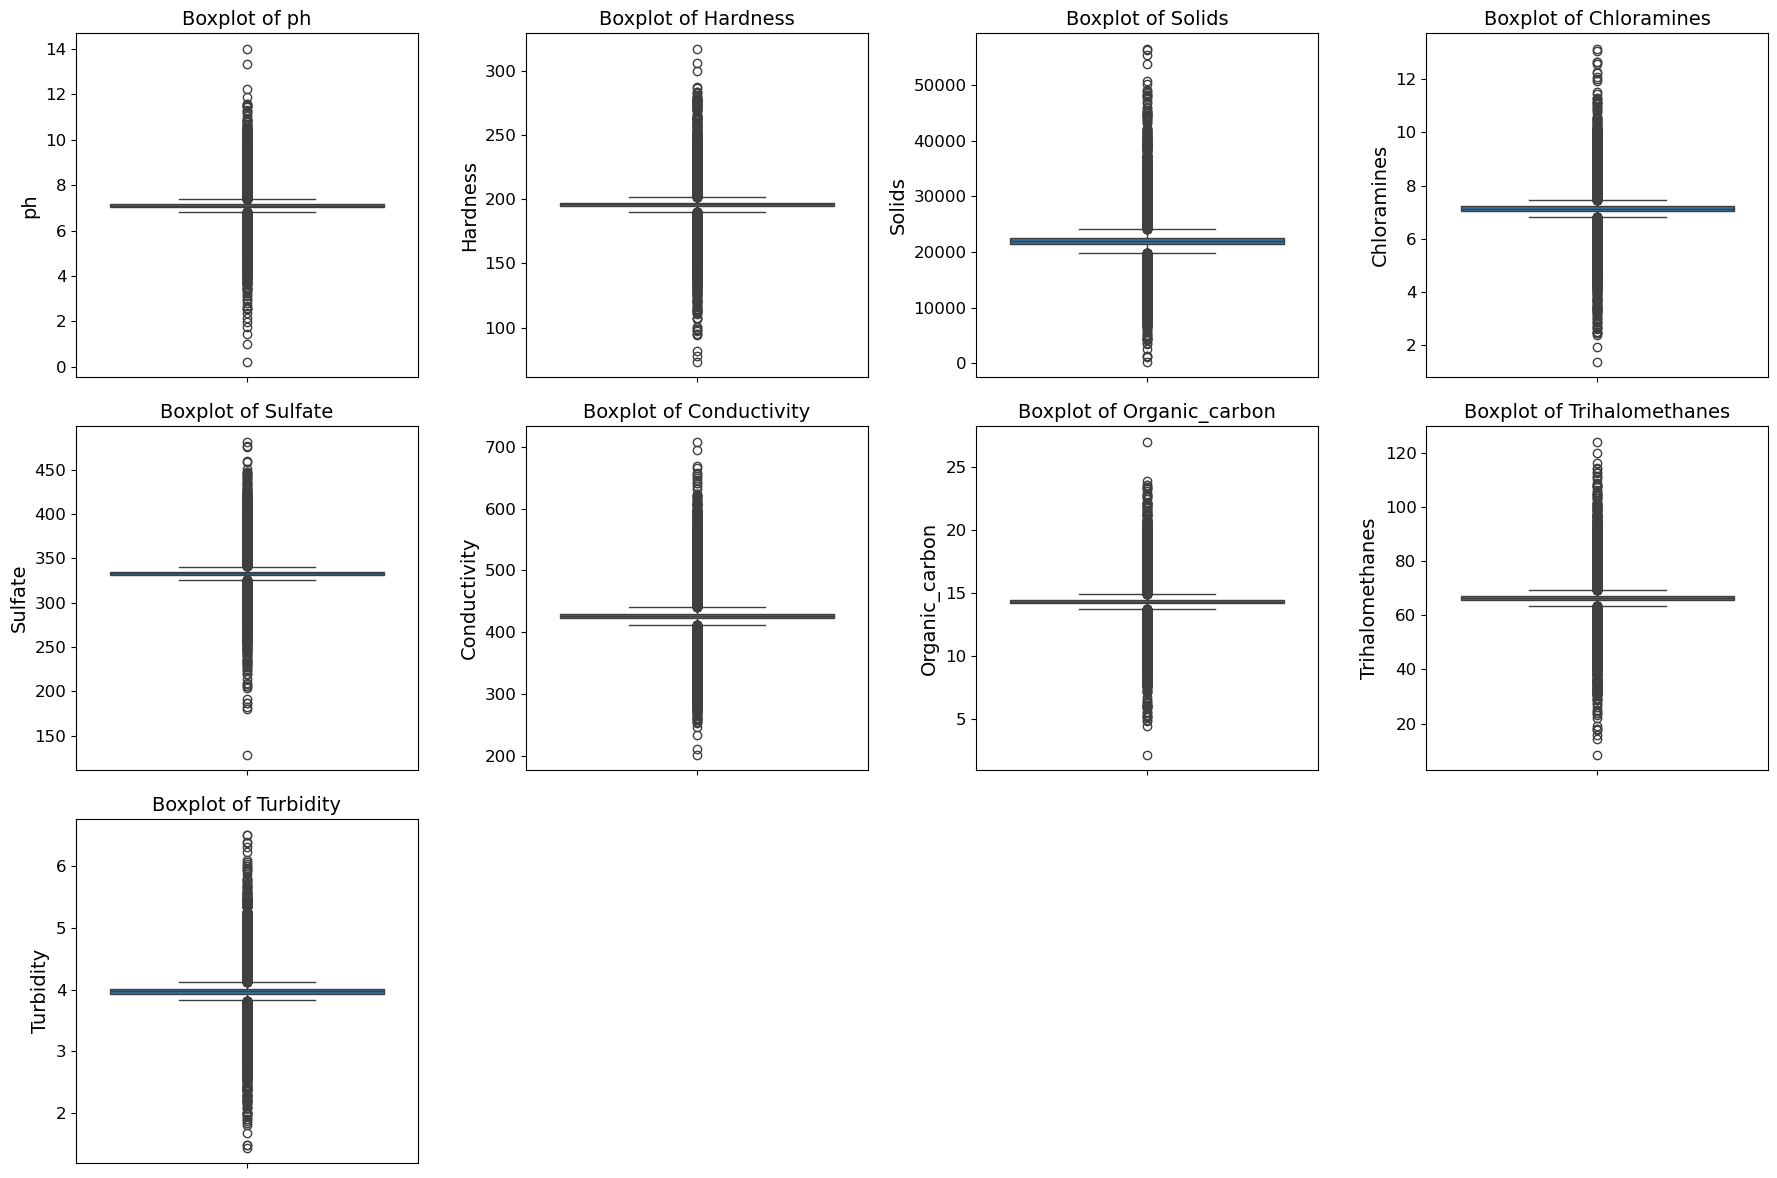

In [14]:
# Exclude target
features = df.drop('Potability', axis=1)

Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((features < (Q1 - 1.5 * IQR)) | 
                (features > (Q3 + 1.5 * IQR)))



# Plot boxplots for each feature

plt.figure(figsize=(18, 12))
for i, col in enumerate(features.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=features[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [13]:
# looking for correlation
corr_matrix = df.corr(numeric_only=True)


corr_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.107334,-0.081289,-0.019698,0.008764,0.007531,0.027975,0.018940,-0.035208,0.032668
Hardness,0.107334,1.000000,-0.050486,-0.016832,-0.109845,0.004295,0.011851,-0.012704,-0.032030,-0.000324
Solids,-0.081289,-0.050486,1.000000,-0.050633,-0.162257,-0.004203,-0.002350,-0.013560,0.023074,0.095617
Chloramines,-0.019698,-0.016832,-0.050633,1.000000,0.010191,-0.025033,-0.023198,0.019057,0.015629,0.058243
Sulfate,0.008764,-0.109845,-0.162257,0.010191,1.000000,-0.017498,0.027896,-0.027109,-0.011495,-0.038707
Conductivity,0.007531,0.004295,-0.004203,-0.025033,-0.017498,1.000000,0.014415,0.003652,0.014103,-0.032677
Organic_carbon,0.027975,0.011851,-0.002350,-0.023198,0.027896,0.014415,1.000000,-0.008310,-0.015844,-0.032175
Trihalomethanes,0.018940,-0.012704,-0.013560,0.019057,-0.027109,0.003652,-0.008310,1.000000,-0.019916,0.029687
Turbidity,-0.035208,-0.032030,0.023074,0.015629,-0.011495,0.014103,-0.015844,-0.019916,1.000000,0.051648
Potability,0.032668,-0.000324,0.095617,0.058243,-0.038707,-0.032677,-0.032175,0.029687,0.051648,1.000000


In [14]:
# checkingfor highly correlated features
corr_matrix["Potability"].sort_values(ascending=False)

Potability         1.000000
Solids             0.095617
Chloramines        0.058243
Turbidity          0.051648
ph                 0.032668
Trihalomethanes    0.029687
Hardness          -0.000324
Organic_carbon    -0.032175
Conductivity      -0.032677
Sulfate           -0.038707
Name: Potability, dtype: float64

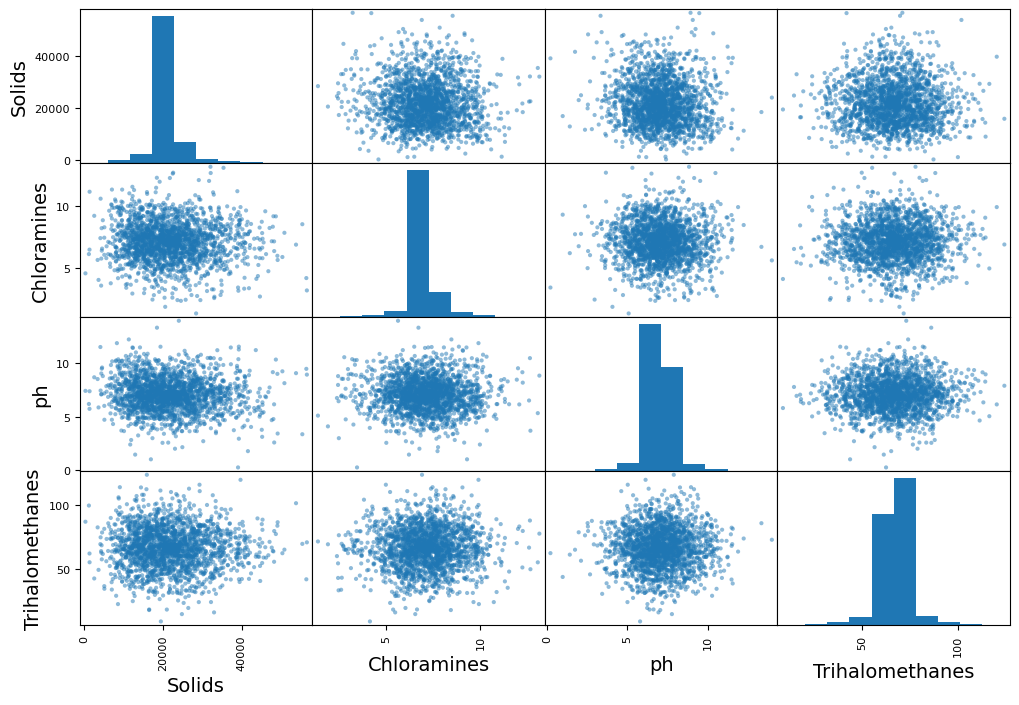

In [17]:
# plotting a scatter matrix of selected features to visualize relationships and check for correlation against the target column
from pandas.plotting import scatter_matrix

attributes = ["Solids", "Chloramines", "ph",
              "Trihalomethanes"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

The features do not show strong correlation with each other. not even with the target variable.

# Prepare the data for machine learning

In [15]:
from sklearn.model_selection import train_test_split # splitting the data

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [16]:
print(f"Train set: {train_set.shape}, Test set: {test_set.shape}")

Train set: (8000, 10), Test set: (2000, 10)


* Be using the test set later to evaluate the model
* use the train set to make a copy of the data

In [17]:
data = train_set.copy() # use the train set to make a copy of the data

In [18]:
X = data.drop("Potability", axis=1) # drop the target column to create the feature matrix
y = data["Potability"].copy() # create the target vector, y

In [19]:
print(f"Feature matrix shape: {X.shape}, Target vector shape: {y.shape}")

Feature matrix shape: (8000, 9), Target vector shape: (8000,)


# Data Cleanning
So far there are no missing values. but let filling missing value with media incase we have missing values in the evaluation data or even in the prediction pipeline.

* we will use media imputation

In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [21]:
# selecting only numerical attributes
X_num = X.select_dtypes(include=[np.number])

In [22]:
# filling missing values with median
imputer.fit(X_num)


SimpleImputer(strategy='median')

In [23]:
imputer.statistics_  # median of each attribute

array([7.09394026e+00, 1.96072488e+02, 2.19744514e+04, 7.13413773e+00,
       3.33098411e+02, 4.26204483e+02, 1.43334467e+01, 6.64619107e+01,
       3.97283158e+00])

In [24]:
# verify that this is the same as manually computing the median of each attribute
X_num.median().values

array([7.09394026e+00, 1.96072488e+02, 2.19744514e+04, 7.13413773e+00,
       3.33098411e+02, 4.26204483e+02, 1.43334467e+01, 6.64619107e+01,
       3.97283158e+00])

In [ ]:
# Transform the training set
#X = imputer.transform(X_num)

In [25]:
imputer.feature_names_in_  # names of the features

array(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
       'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype=object)

Earlier we saw we have outlier. let deal with the outlier using ensemble method called Isolation Forest


In [27]:
X.shape, X.dtypes  # shape and datatypes of the feature matrix

((8000, 9),
 ph                 float64
 Hardness           float64
 Solids             float64
 Chloramines        float64
 Sulfate            float64
 Conductivity       float64
 Organic_carbon     float64
 Trihalomethanes    float64
 Turbidity          float64
 dtype: object)

# Feature Scaling and Transformation

In [28]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_std_scaled = std_scaler.fit_transform(X_num) # scaling the numerical features

In [29]:
X_std_scaled[:10]

array([[ 2.26856659e-02,  2.45377438e-02, -1.37931712e-01,
        -1.29439761e-01, -1.88343195e-02, -5.12185953e-02,
        -1.21073754e-01, -2.10336790e-01, -2.66931196e-01],
       [ 7.66134541e-02,  8.14264950e-02, -3.27625564e-02,
        -2.23452243e-02,  3.70106982e-02,  2.24932106e-01,
         3.96043463e-01,  8.66890568e-02, -1.49926097e-01],
       [-5.74466765e-02, -3.75165425e-02, -2.84096721e-01,
         1.66635912e-01, -6.75661202e-02, -1.44917755e-01,
        -8.59575900e-02, -3.20975570e-02, -4.90986412e-02],
       [-8.10721472e-02,  8.59445473e-02, -7.16608539e-02,
         1.42440925e-01,  3.18838942e-02,  1.04829541e-01,
         6.47699263e-02, -1.58622477e-01,  2.86768377e-02],
       [ 5.00650204e-02, -6.96331378e-02,  4.41400508e-02,
         6.54602304e-02,  2.55698961e-02, -4.57675867e-02,
        -1.26258853e-01,  7.47825854e-02, -1.21643251e-01],
       [ 1.35753669e-01,  2.04836689e-02, -2.55700343e-02,
         1.00560769e-01, -6.04037328e-02, -7.625568

In [30]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler()) # creating a pipeline for numerical attributes

In [31]:
from sklearn.compose import ColumnTransformer

num_attribs = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']



preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs)
])

In [35]:
preprocessing.set_params(num__simpleimputer__strategy="median")

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['ph', 'Hardness', 'Solids', 'Chloramines',
                                  'Sulfate', 'Conductivity', 'Organic_carbon',
                                  'Trihalomethanes', 'Turbidity'])])

In [ ]:
#from sklearn.compose import make_column_selector, make_column_transformer

#preprocessing = make_column_transformer(
    #(num_pipeline, make_column_selector(dtype_include=np.number)))

# Select and Train the Model


In [43]:
from sklearn.linear_model import  LogisticRegression

log_reg = make_pipeline(preprocessing, LogisticRegression())
log_reg.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['ph', 'Hardness', 'Solids',
                                                   'Chloramines', 'Sulfate',
                                                   'Conductivity',
                                                   'Organic_carbon',
                                                   'Trihalomethanes',
                                                   'Turbidity'])])),
                ('logisticregression', LogisticRegression())])

In [37]:
preprocessing.get_feature_names_out()

array(['num__ph', 'num__Hardness', 'num__Solids', 'num__Chloramines',
       'num__Sulfate', 'num__Conductivity', 'num__Organic_carbon',
       'num__Trihalomethanes', 'num__Turbidity'], dtype=object)

In [44]:
X_predictions = log_reg.predict(X)
X_predictions[:5]  # -2 = rounded to the nearest hundred

array([0, 0, 0, 0, 1], dtype=int64)

In [45]:
# chekcing the target values to see if the predictions make sense
y.iloc[:5].values

array([0, 0, 0, 0, 1], dtype=int64)

In [49]:
# Training accuracy
train_acc = log_reg.score(X, y)
print("Training Accuracy:", train_acc)

Training Accuracy: 0.822375


In [50]:
# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print("Training Confusion Matrix:\n", confusion_matrix(y, X_predictions))

# Classification report (includes precision, recall, f1, accuracy)
print("\nTraining Classification Report:\n", classification_report(y, X_predictions))

Training Confusion Matrix:
 [[3233  761]
 [ 660 3346]]

Training Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      3994
           1       0.81      0.84      0.82      4006

    accuracy                           0.82      8000
   macro avg       0.82      0.82      0.82      8000
weighted avg       0.82      0.82      0.82      8000



# Evaluation Using Cross Validation


In [58]:
from sklearn.model_selection import cross_val_score

cross_val_score(log_reg, X, y, cv=10, scoring="accuracy")

array([0.80875, 0.81375, 0.825  , 0.81125, 0.78625, 0.8325 , 0.8325 ,
       0.8175 , 0.82625, 0.8275 ])

array([0.43803539, 0.42573466, 0.44017042, 0.42352686, 0.41833001])

In [52]:
log_reg.fit(X, y)
y_pred = log_reg.predict(X)


In [53]:
# Training accuracy
train_acc = log_reg.score(X, y)
print("Training Accuracy:", train_acc)

Training Accuracy: 0.822375


# Evaluation on the Test Set

Test Confusion Matrix:
 [[820 186]
 [157 837]]

Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1006
           1       0.82      0.84      0.83       994

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000

Test ROC-AUC Score: 0.82348764555524


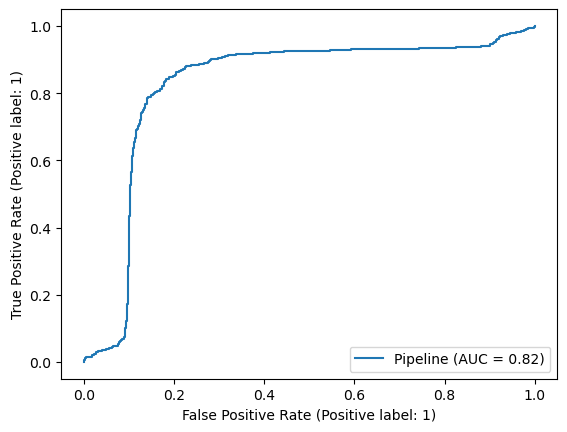

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
# Predictions on test set
X_test = test_set.drop("Potability", axis=1)
y_test = test_set["Potability"].copy()
y_test_pred = log_reg.predict(X_test)

y_test_proba = log_reg.predict_proba(X_test)[:, 1]

# Confusion matrix
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Classification report (precision, recall, f1, accuracy)
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

# ROC-AUC score
print("Test ROC-AUC Score:", roc_auc_score(y_test, y_test_proba))

# Plot ROC Curve
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.show()